In [1]:
__author__ = 'Anastasia Tsvetkova'
__email__  = 'tsvetkova.lea@gmail.com'

import yaml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from avalanche import LC, Restored_LC
import random

### Let's generate several light curves

In [2]:
lc = LC(tau_min=0.0009, res=0.001, n_cut=200)
%timeit lc.generate_avalanche()

24.4 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


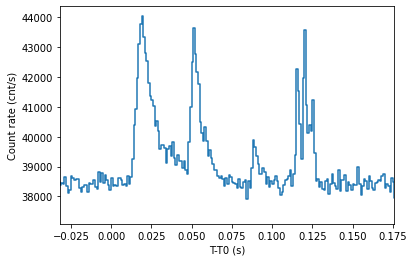

In [37]:
lc = LC(tau_min=0.0009, res=0.001, n_cut=200)
par = lc.generate_avalanche(seed=7)
lc.plot_lc()

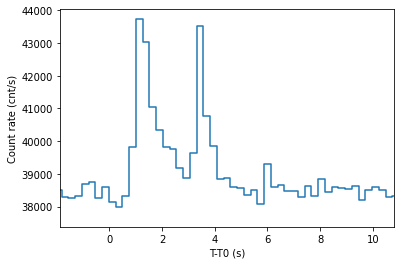

In [49]:
lc = LC(tau_min=0.2, res=0.256)
par = lc.generate_avalanche(seed=7)
lc.plot_lc()

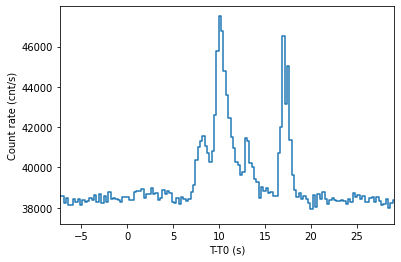

In [52]:
lc = LC()
par = lc.generate_avalanche(seed=17)
lc.plot_lc(save=False)

Time resolution:  0.256
Generating a new pulse with tau=2.232
Generating a new pulse with tau=0.870
Generating a new pulse with tau=0.396
Generating a new pulse with tau=0.165


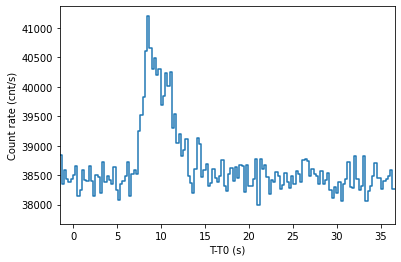

In [16]:
lc = LC(verbose=True)
par = lc.generate_avalanche()
lc.plot_lc()

### Let's open a yaml-file with avalanches and plot the T90 distribution for the sample

In [6]:
with open("./avalanche_parameters.yml", 'r') as f:
    loaded_data = yaml.safe_load(f)

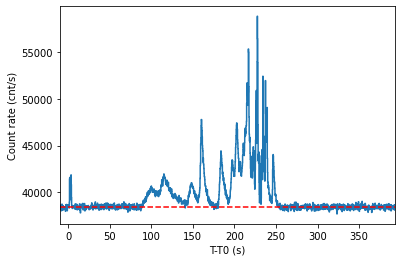

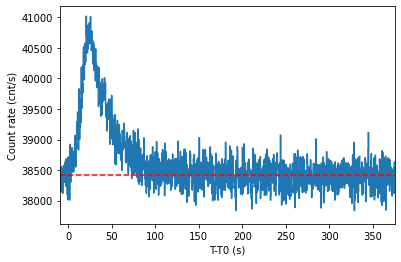

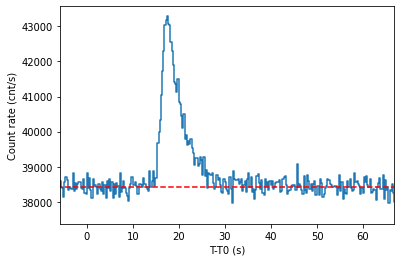

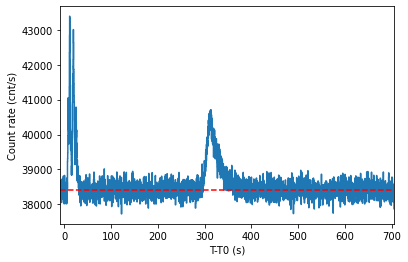

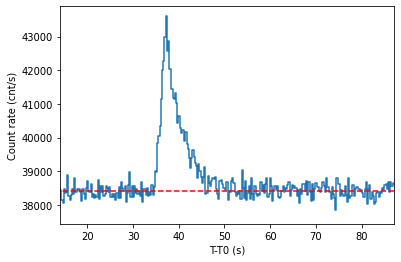

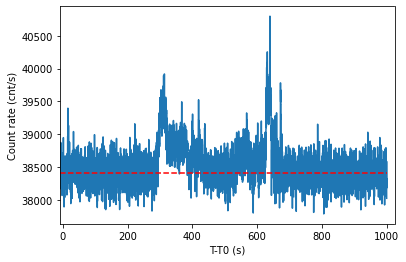

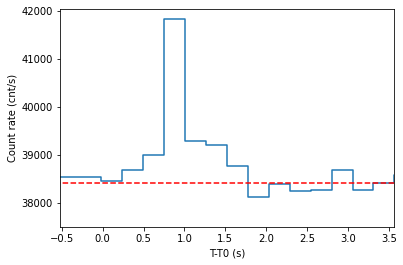

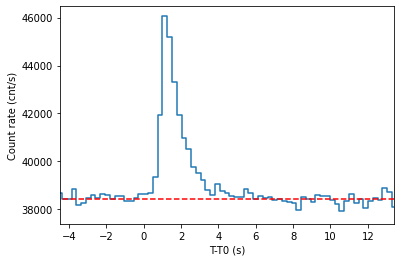

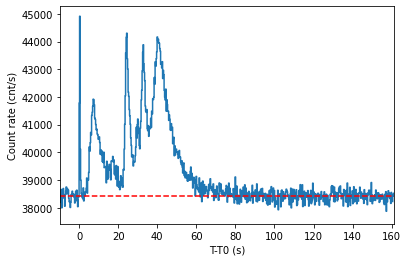

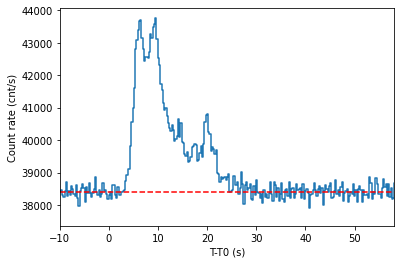

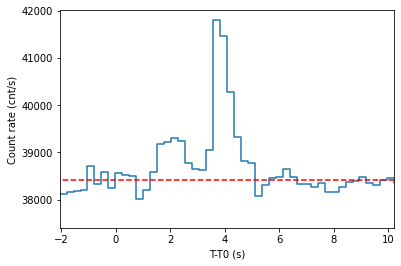

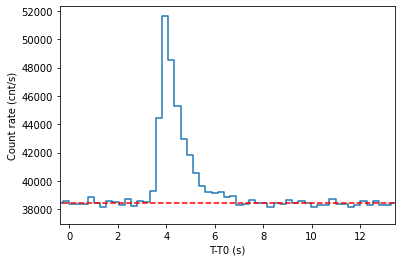

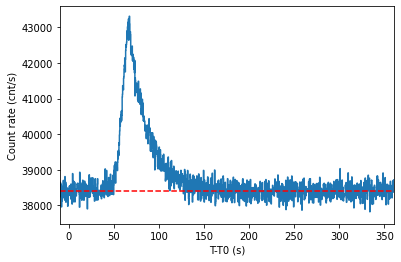

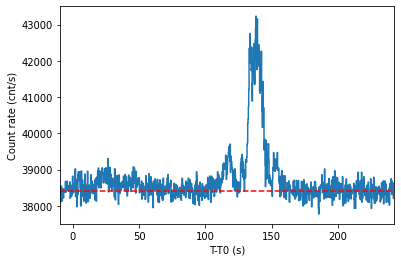

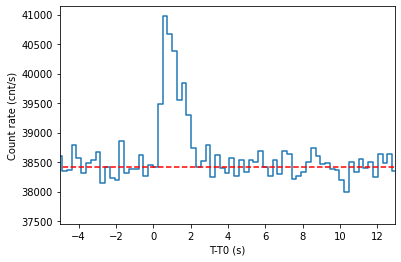

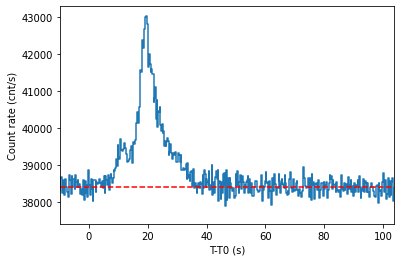

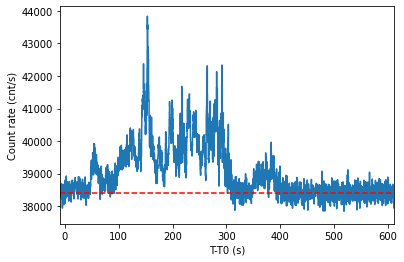

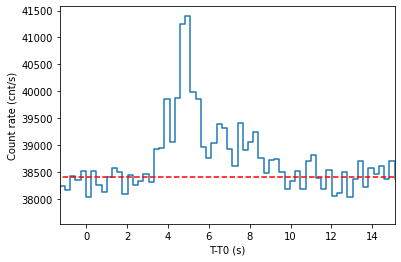

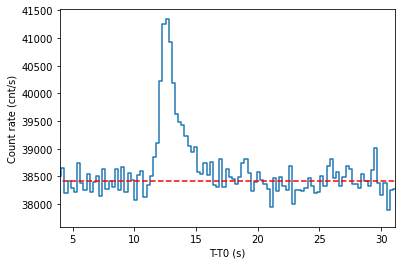

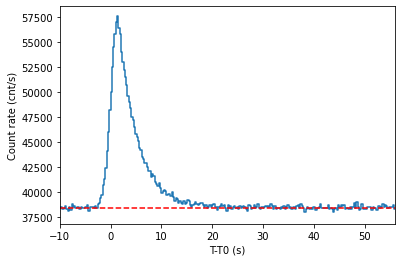

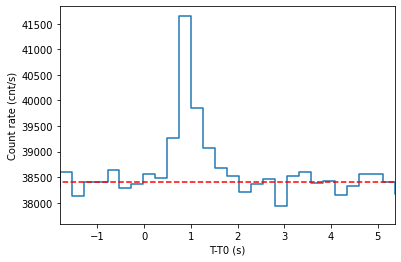

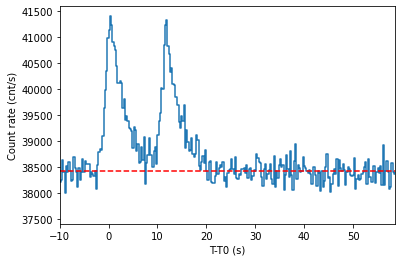

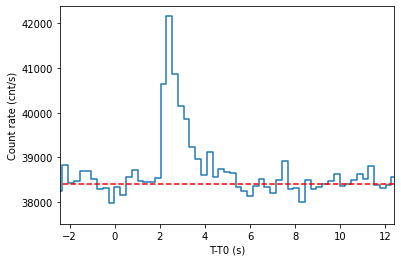

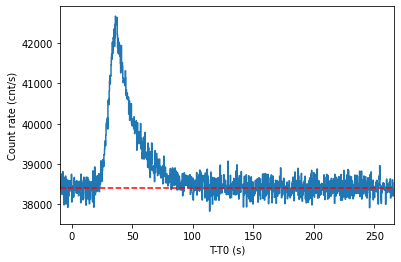

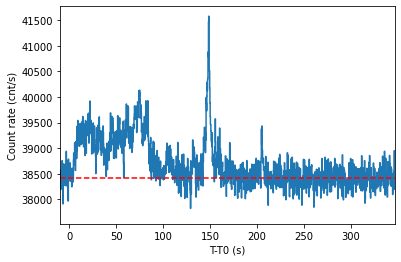

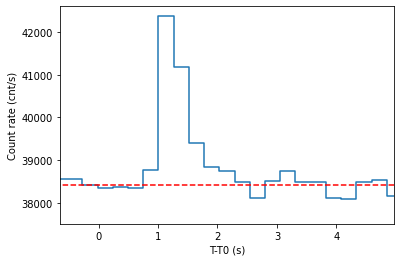

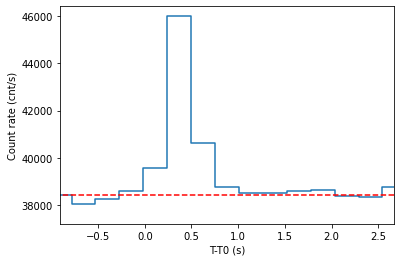

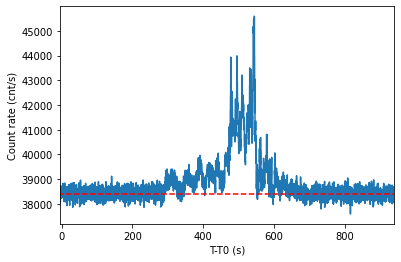

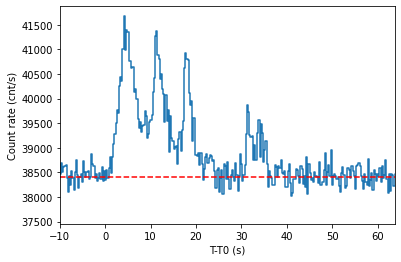

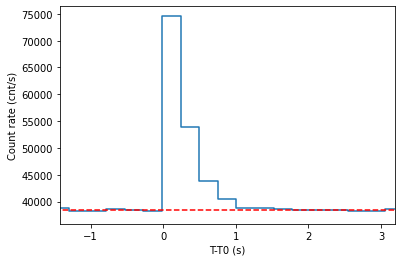

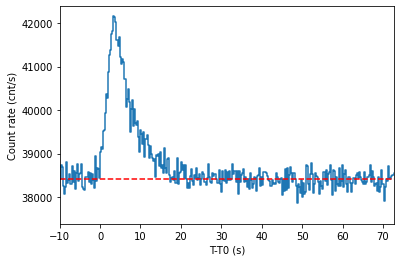

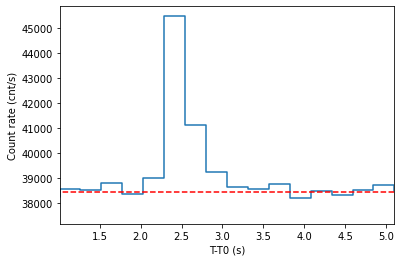

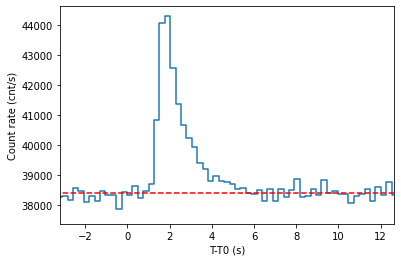

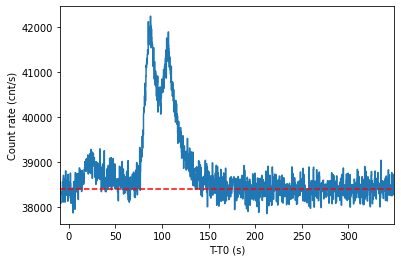

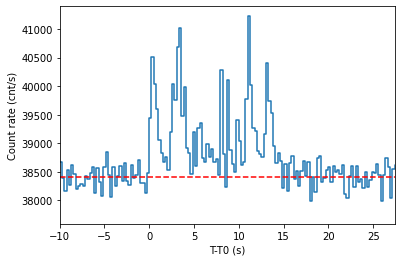

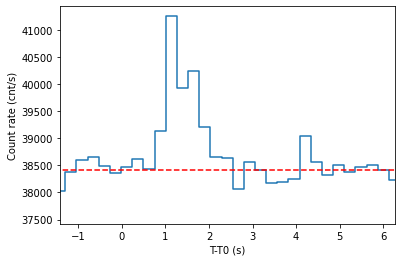

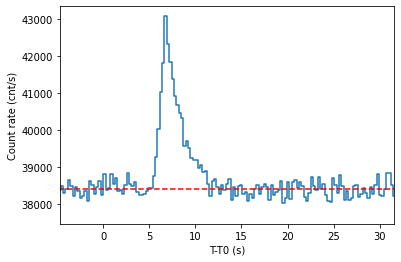

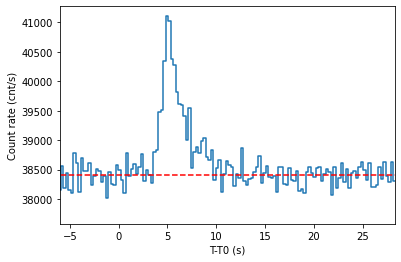

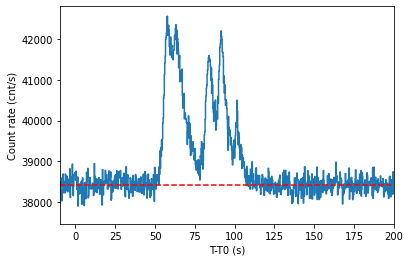

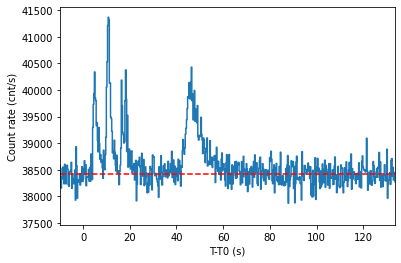

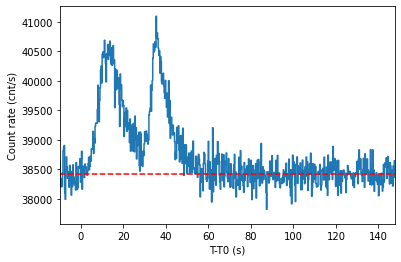

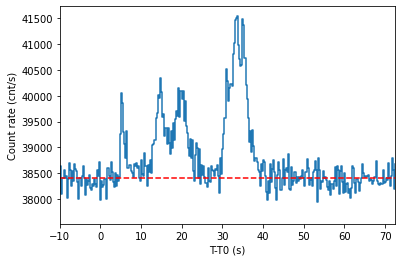

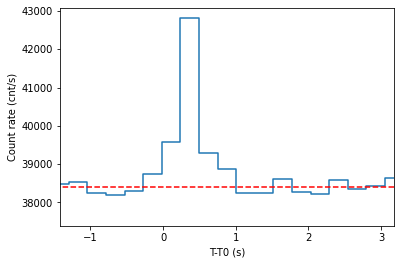

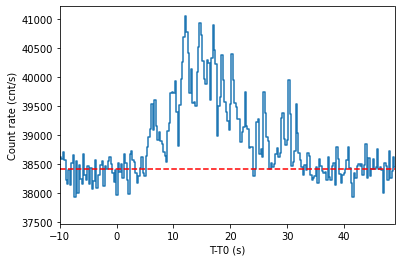

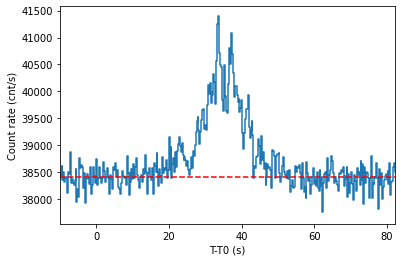

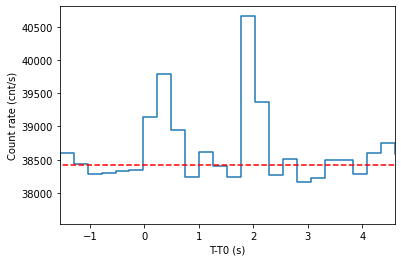

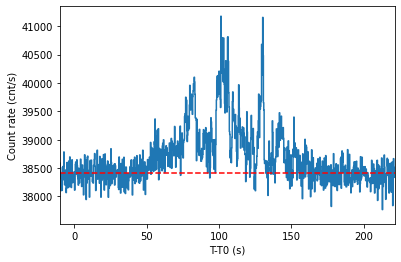

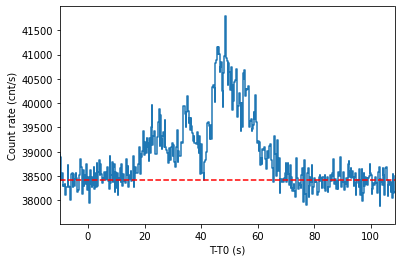

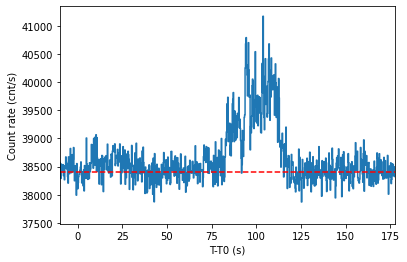

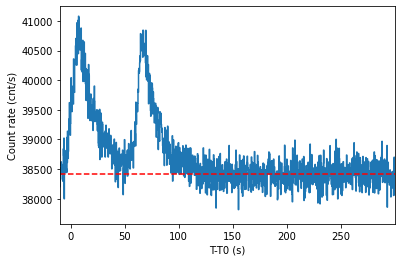

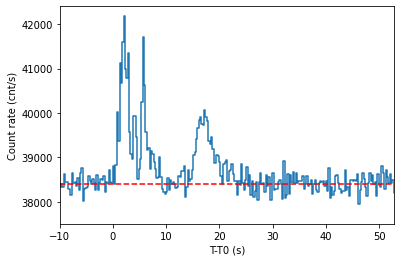

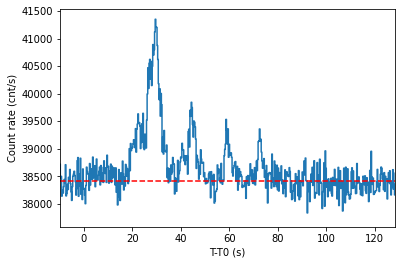

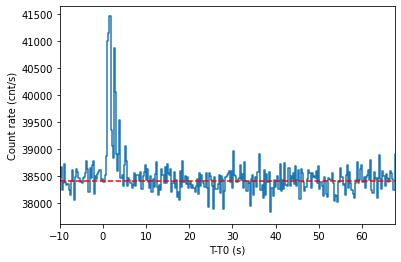

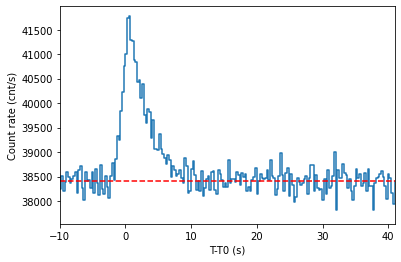

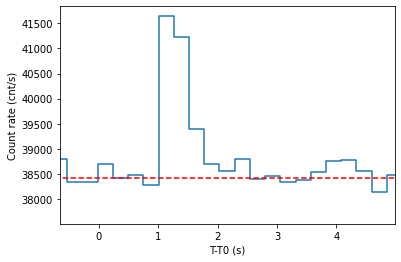

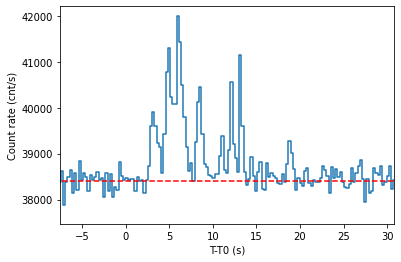

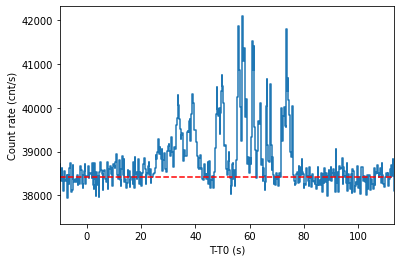

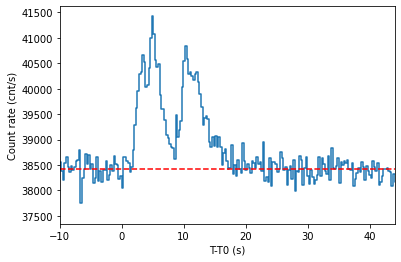

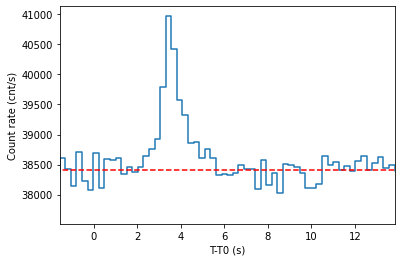

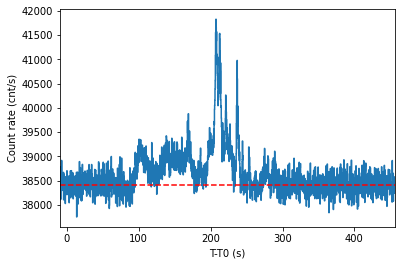

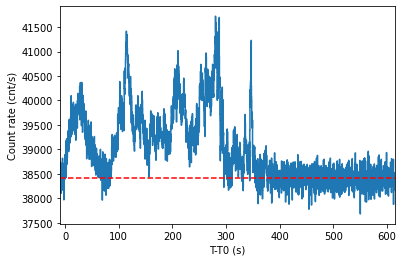

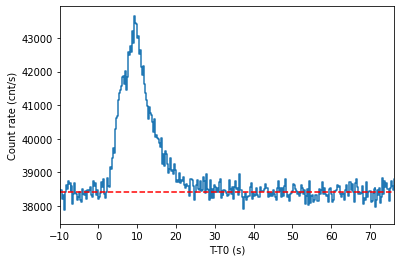

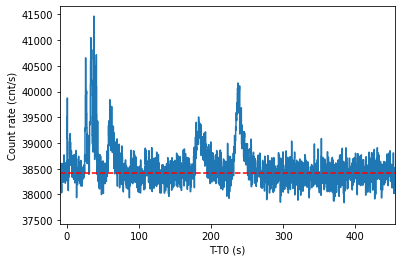

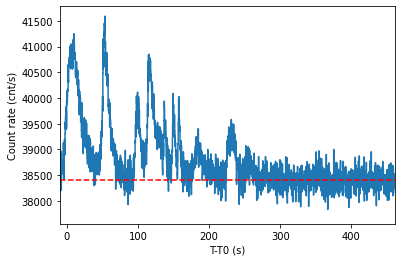

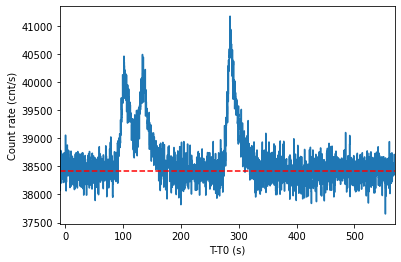

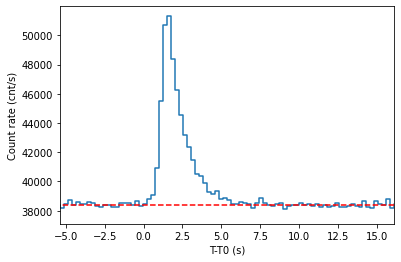

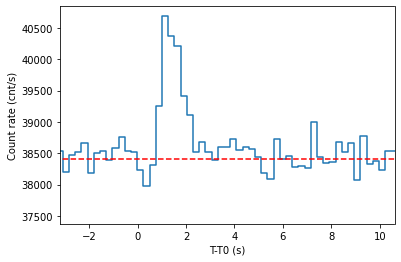

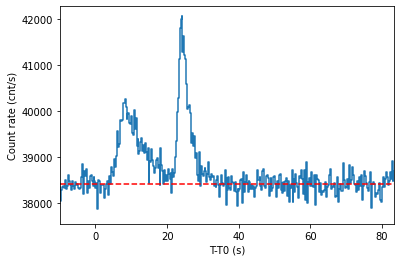

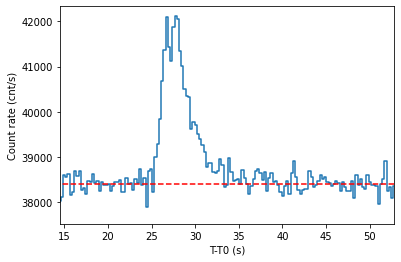

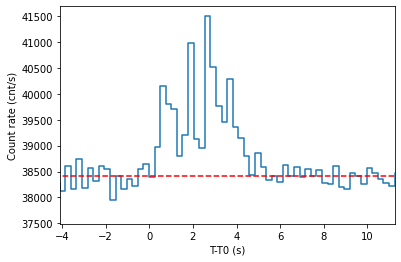

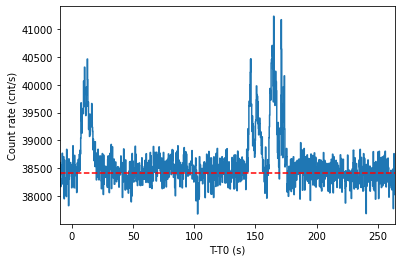

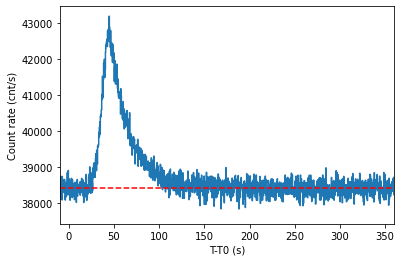

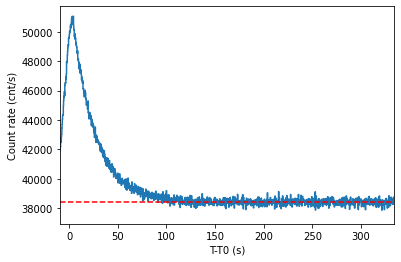

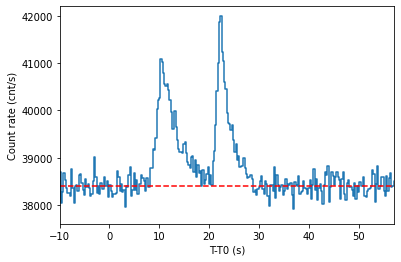

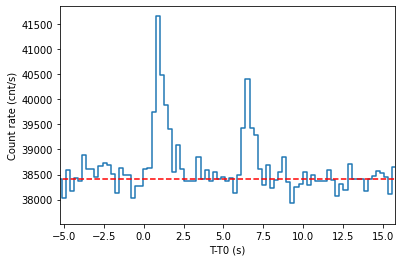

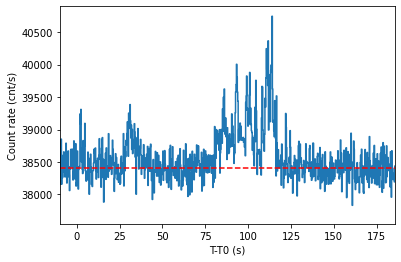

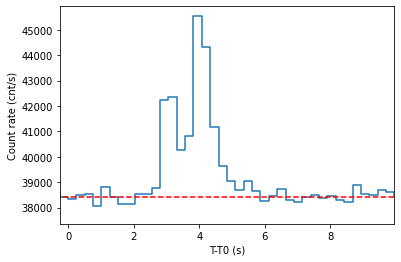

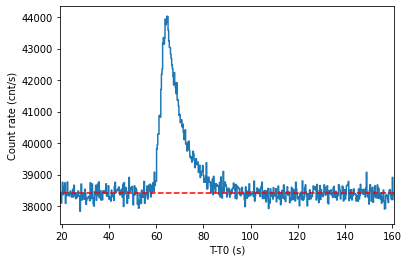

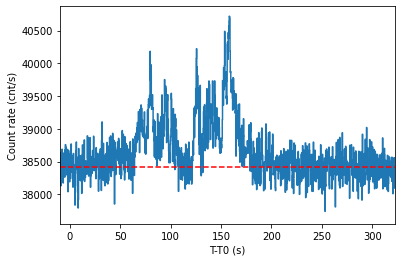

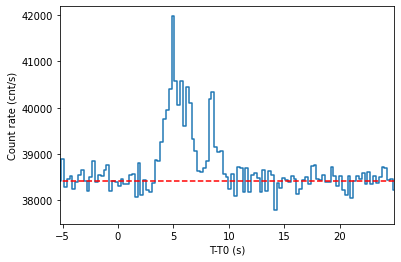

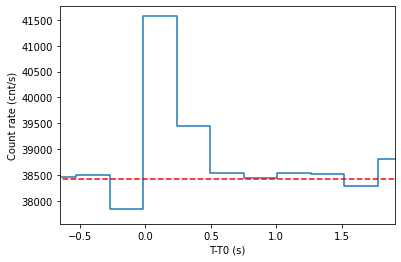

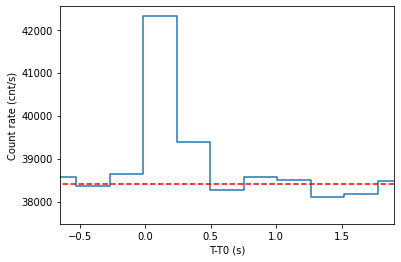

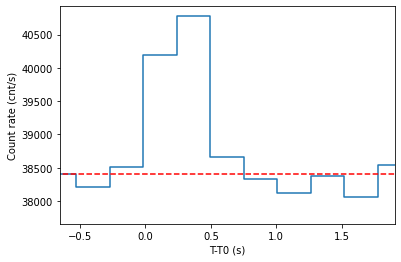

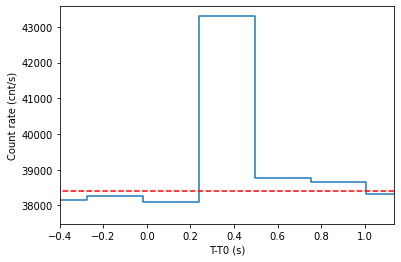

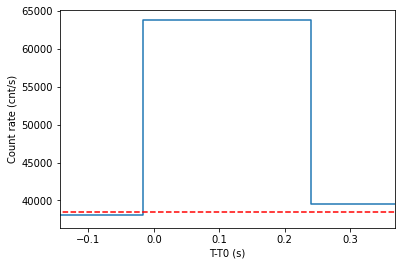

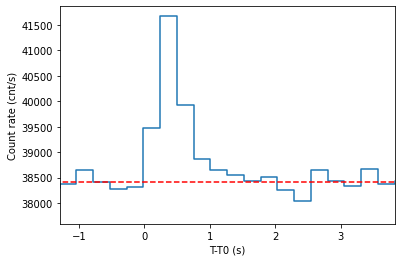

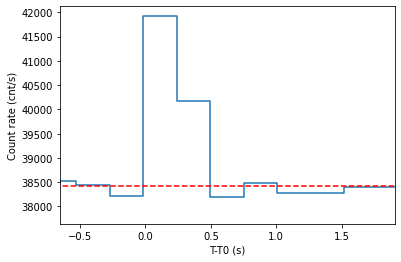

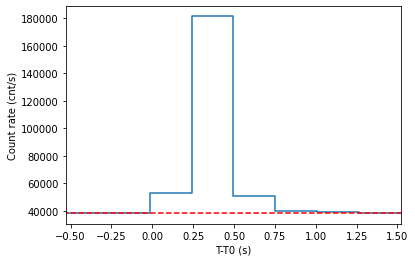

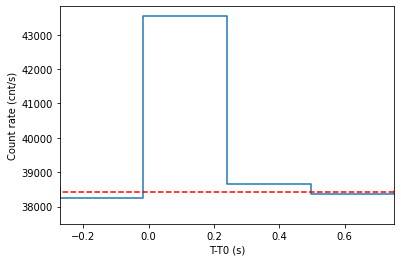

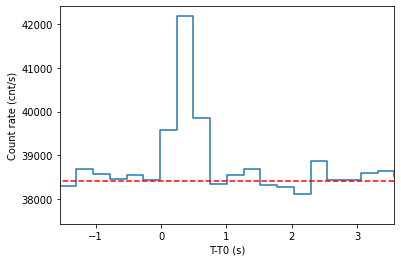

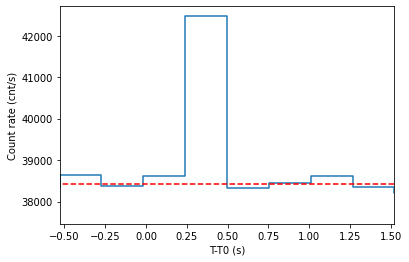

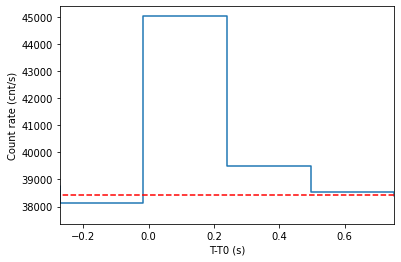

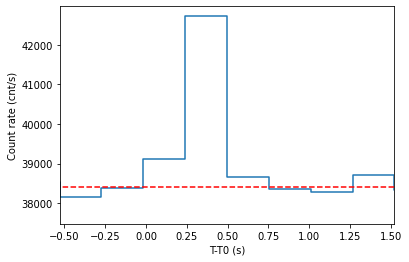

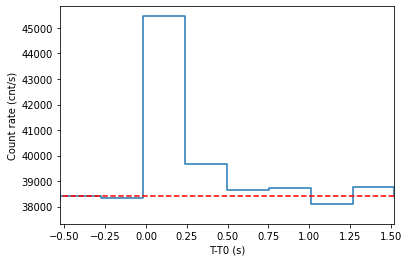

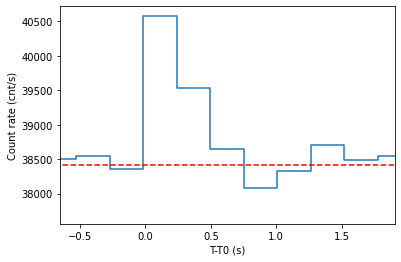

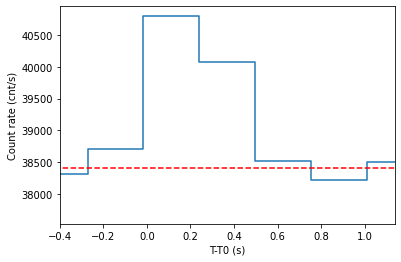

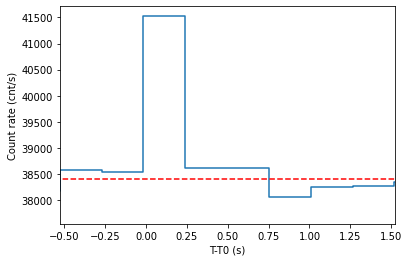

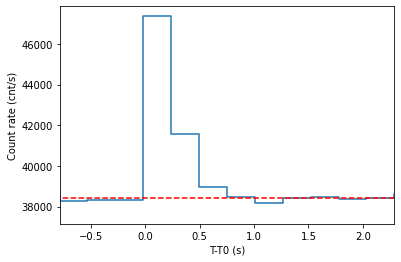

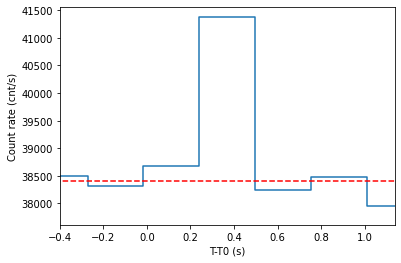

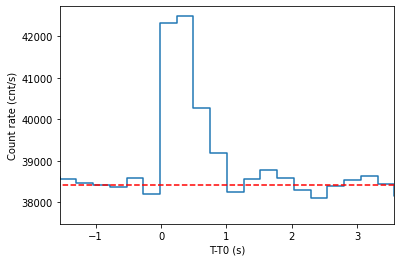

In [8]:
T90 = list()

for name in loaded_data:
    par_list = list(name.values())[0]
    lc = Restored_LC(par_list)
    lc.plot_lc()
    T90.append(float(lc.T90[0]))
    

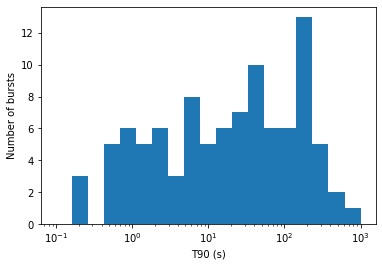

In [20]:
plt.hist(T90, bins=np.geomspace(0.1,1000,20))
plt.xlabel("T90 (s)")
plt.ylabel("Number of bursts")
plt.xscale('log')
plt.show()